<font size=6><b>lec08. [실전-데이콘] 전화해지 고객 분류

<img src="./imgs/lec08.png">
* ref : * ref : https://dacon.io/competitions/official/236075/data

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [6]:
# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from scikitplot.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve

# Data Load

In [8]:
train = pd.read_csv("./datasets/train.csv")
test  = pd.read_csv("./datasets/test.csv")
submit = pd.read_csv("./datasets/sample_submission.csv")

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


# EDA

## target Feature
* <font color=red size=4><b> 불균형

양성비율 : 10.986755
0    26882
1     3318
Name: 전화해지여부, dtype: int64


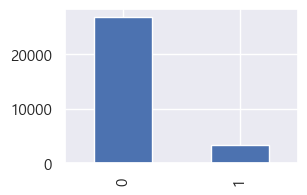

In [10]:
print( f"양성비율 : {len(train[train['전화해지여부']== 1]) / len(train) * 100 :2f}" )
print( train['전화해지여부'].value_counts() )
train['전화해지여부'].value_counts().plot(kind='bar', figsize=(3,2))
plt.show()



## 히스토그램

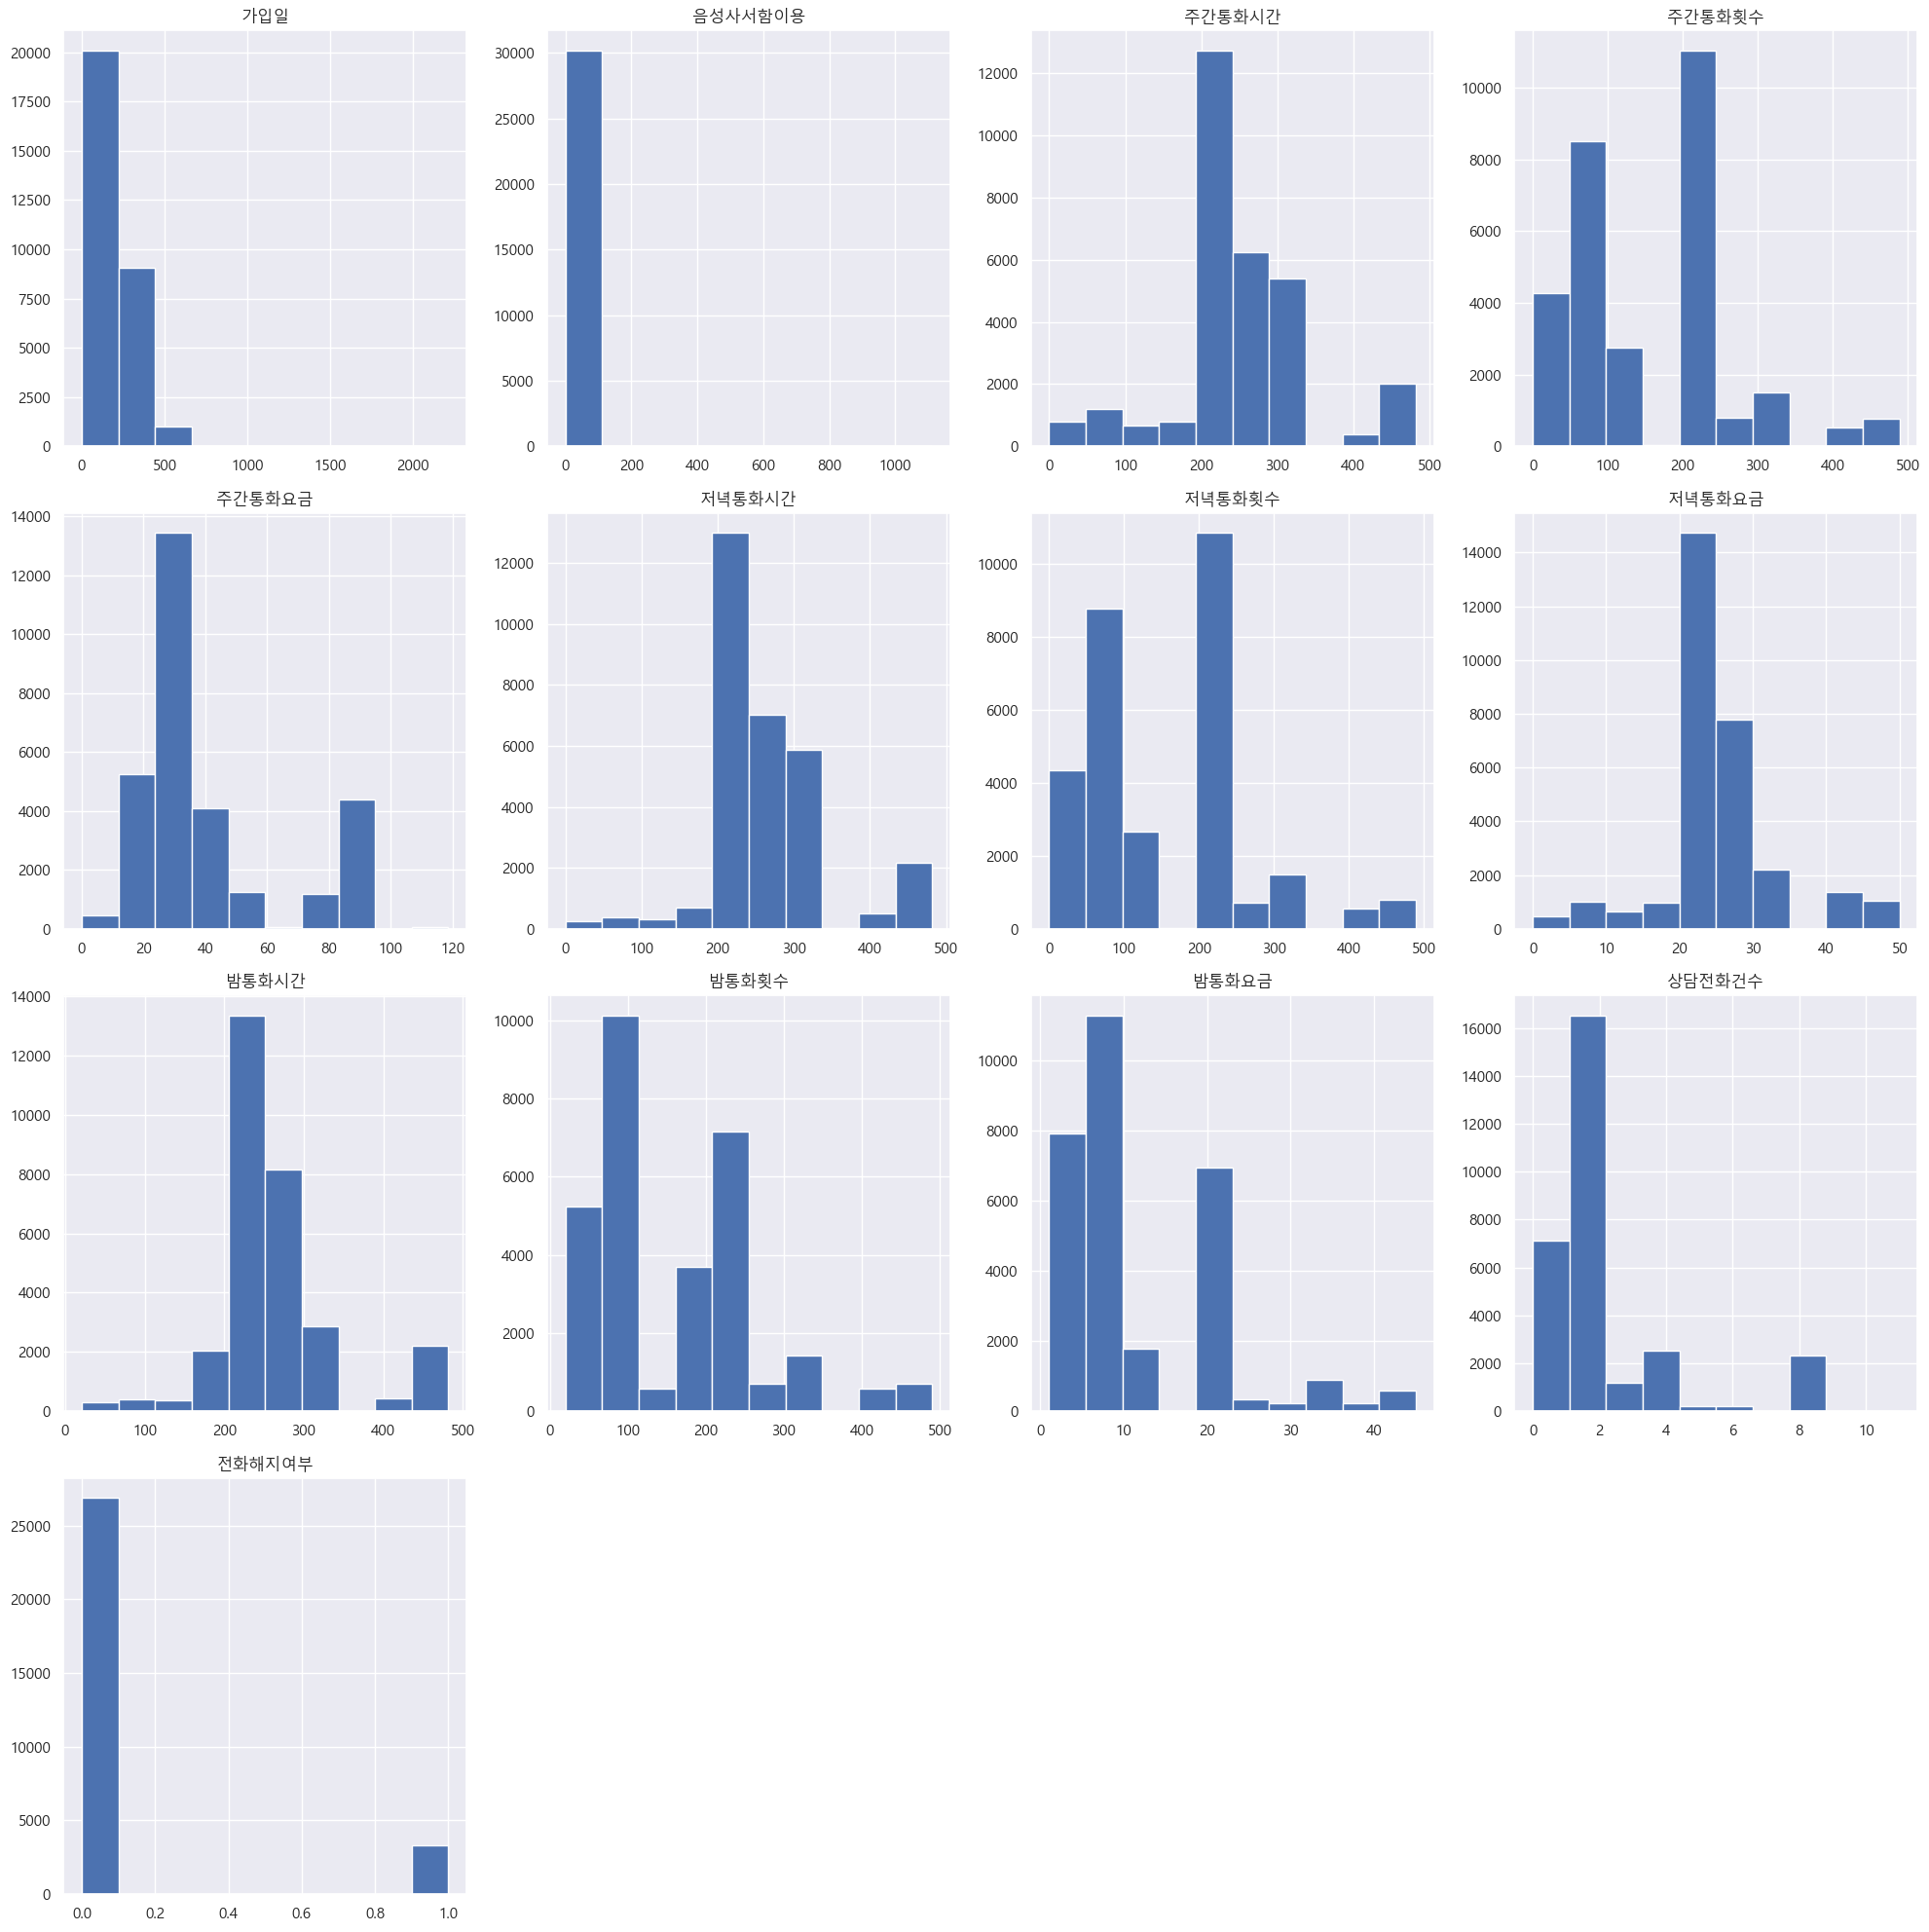

In [11]:
train.hist(figsize=(20,20))
plt.tight_layout()
plt.show()

In [12]:
# sns.pairplot(data=train , hue='전화해지여부')
# plt.show()

<img src="./imgs/lec08_pairplot.png">

In [13]:
pd.concat([train[train['전화해지여부']==1].describe().T, train[train['전화해지여부']==0].describe().T], axis=1)

,count,mean,std,min,25%,50%,75%,max,count,mean,std,min,25%,50%,75%,max
가입일,3318.0,162.088608,120.112890,1.00,67.00,135.00,229.000,2012.00,26882.0,159.441857,124.193729,1.00,63.00,116.00,228.00,2212.00
음성사서함이용,3318.0,7.587101,18.348552,0.00,0.00,1.00,1.000,117.00,26882.0,12.587159,25.566918,0.00,0.00,1.00,23.00,1112.00
주간통화시간,3318.0,257.764708,80.513591,0.10,224.20,250.25,290.800,481.90,26882.0,249.674619,84.830161,0.00,222.50,233.60,289.40,481.20
주간통화횟수,3318.0,162.348403,100.104352,0.00,88.00,143.00,223.000,489.00,26882.0,158.784131,101.747847,0.00,88.00,115.00,223.00,489.00
주간통화요금,3318.0,36.406841,19.427776,0.10,24.00,29.80,40.575,117.80,26882.0,41.669660,23.536478,0.00,24.50,31.20,46.20,118.60
저녁통화시간,3318.0,263.212899,68.344831,21.10,223.90,244.10,289.900,481.40,26882.0,263.251451,74.741785,0.10,223.70,242.95,290.40,481.60
저녁통화횟수,3318.0,157.230561,100.908386,20.00,87.00,111.00,223.000,489.00,26882.0,158.628078,102.359429,0.00,87.00,112.00,223.00,489.00
저녁통화요금,3318.0,25.433927,7.490529,2.29,22.22,23.32,28.880,49.89,26882.0,25.389364,8.223539,0.00,22.22,23.30,28.82,49.98
밤통화시간,3318.0,262.835142,67.395499,22.60,223.70,244.30,290.100,481.00,26882.0,263.512730,74.529181,20.80,223.70,242.70,290.50,481.80
밤통화횟수,3318.0,156.143761,101.216735,20.00,83.00,110.00,223.000,488.00,26882.0,157.158954,101.785060,20.00,87.00,107.00,222.00,490.00


In [14]:
train[train['전화해지여부']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
가입일,26882.0,159.441857,124.193729,1.00,63.00,116.00,228.00,2212.00
음성사서함이용,26882.0,12.587159,25.566918,0.00,0.00,1.00,23.00,1112.00
주간통화시간,26882.0,249.674619,84.830161,0.00,222.50,233.60,289.40,481.20
주간통화횟수,26882.0,158.784131,101.747847,0.00,88.00,115.00,223.00,489.00
주간통화요금,26882.0,41.669660,23.536478,0.00,24.50,31.20,46.20,118.60
저녁통화시간,26882.0,263.251451,74.741785,0.10,223.70,242.95,290.40,481.60
저녁통화횟수,26882.0,158.628078,102.359429,0.00,87.00,112.00,223.00,489.00
저녁통화요금,26882.0,25.389364,8.223539,0.00,22.22,23.30,28.82,49.98
밤통화시간,26882.0,263.512730,74.529181,20.80,223.70,242.70,290.50,481.80
밤통화횟수,26882.0,157.158954,101.785060,20.00,87.00,107.00,222.00,490.00


In [15]:
# ['주간통화시간', '주간통화횟수', '주간통화요금']
# ['저녁통화시간', '저녁통화횟수', '저녁통화요금'] 
# ['밤통화시간', '밤통화횟수', '밤통화요금']
# ['ID', '가입일', '음성사서함이용','상담전화건수', '전화해지여부']
train.columns

Index(['ID', '가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '주간통화요금', '저녁통화시간',
       '저녁통화횟수', '저녁통화요금', '밤통화시간', '밤통화횟수', '밤통화요금', '상담전화건수', '전화해지여부'],
      dtype='object')

In [16]:
# plt.figure(figsize=(3,2))
# sns.lmplot(data=train, x="주간통화횟수", y="주간통화시간", hue="전화해지여부")
# plt.show()

In [17]:
# fig, ax = plt.subplots(1, 2, figsize=(18,4))

# amount_val = df['Amount'].values
# time_val = df['Time'].values

# sns.distplot(amount_val, ax=ax[0], color='r')
# ax[0].set_title('Amount')
# ax[0].set_xlim([min(amount_val), max(amount_val)])

# sns.distplot(time_val, ax=ax[1], color='b')
# ax[1].set_title('Time')
# ax[1].set_xlim([min(time_val), max(time_val)])

# plt.show()

## nunique()

In [19]:
for col in train.columns:
    print(col, train[col].nunique())

ID 30200
가입일 345
음성사서함이용 76
주간통화시간 2771
주간통화횟수 239
주간통화요금 735
저녁통화시간 2606
저녁통화횟수 241
저녁통화요금 1840
밤통화시간 2545
밤통화횟수 233
밤통화요금 1216
상담전화건수 11
전화해지여부 2


In [ ]:
# for col in df.columns:
#     print(col, df[col].value_counts())

# Feature Engineering

In [ ]:
# # train['y'] = datetime.today().year
# train['y'] = train['regdate'].dt.year
# train['m'] = train['regdate'].dt.month
# train['d'] = train['regdate'].dt.day
# train['h'] = train['regdate'].dt.hour